In [30]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# ===============================
# 2. LOAD DATASET
# ===============================
df = pd.read_csv("online_payment_fraud_realistic.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (20000, 11)


,transaction_amount,transaction_hour,customer_age,customer_tenure_months,merchant_risk_level,transaction_velocity,transaction_type,device_type,location_type,payment_method,is_fraud
0,1173.17,21,66,40,Low,3,POS,Mobile,Domestic,Card,1
1,7525.30,1,36,86,Low,1,E-commerce,Desktop,Domestic,Card,0
2,3291.86,3,52,29,Low,6,E-commerce,Mobile,Domestic,Card,0
3,2282.36,12,63,9,Medium,1,In-App,Mobile,Domestic,Wallet,0
4,424.06,12,23,21,High,4,POS,Mobile,International,Wallet,1


In [31]:
df=pd.read_csv("C:/Users/shafe/OneDrive/Desktop/PROJECT/online_payment_fraud_realistic.csv")
df

,transaction_amount,transaction_hour,customer_age,customer_tenure_months,merchant_risk_level,transaction_velocity,transaction_type,device_type,location_type,payment_method,is_fraud
0,1173.17,21,66,40,Low,3,POS,Mobile,Domestic,Card,1
1,7525.30,1,36,86,Low,1,E-commerce,Desktop,Domestic,Card,0
2,3291.86,3,52,29,Low,6,E-commerce,Mobile,Domestic,Card,0
3,2282.36,12,63,9,Medium,1,In-App,Mobile,Domestic,Wallet,0
4,424.06,12,23,21,High,4,POS,Mobile,International,Wallet,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,5239.71,13,25,113,Low,5,POS,Mobile,International,Wallet,1
19996,119.86,23,54,114,High,5,POS,Mobile,Domestic,UPI,1
19997,904.93,9,23,46,Low,5,E-commerce,Desktop,Domestic,Card,0
19998,1464.41,7,51,119,Low,6,E-commerce,Desktop,International,Card,1


In [32]:
df.head()

,transaction_amount,transaction_hour,customer_age,customer_tenure_months,merchant_risk_level,transaction_velocity,transaction_type,device_type,location_type,payment_method,is_fraud
0,1173.17,21,66,40,Low,3,POS,Mobile,Domestic,Card,1
1,7525.30,1,36,86,Low,1,E-commerce,Desktop,Domestic,Card,0
2,3291.86,3,52,29,Low,6,E-commerce,Mobile,Domestic,Card,0
3,2282.36,12,63,9,Medium,1,In-App,Mobile,Domestic,Wallet,0
4,424.06,12,23,21,High,4,POS,Mobile,International,Wallet,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      20000 non-null  float64
 1   transaction_hour        20000 non-null  int64  
 2   customer_age            20000 non-null  int64  
 3   customer_tenure_months  20000 non-null  int64  
 4   merchant_risk_level     20000 non-null  object 
 5   transaction_velocity    20000 non-null  int64  
 6   transaction_type        20000 non-null  object 
 7   device_type             20000 non-null  object 
 8   location_type           20000 non-null  object 
 9   payment_method          20000 non-null  object 
 10  is_fraud                20000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.7+ MB


In [34]:
df.isnull().sum()


transaction_amount        0
transaction_hour          0
customer_age              0
customer_tenure_months    0
merchant_risk_level       0
transaction_velocity      0
transaction_type          0
device_type               0
location_type             0
payment_method            0
is_fraud                  0
dtype: int64

In [35]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing categorical values
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [36]:
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [37]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definitions

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Hyperparameter Tuning

In [41]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1]
    }
}
best_models = {}
results = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    y_pred = grid.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[name] = acc
    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc}")
    print(classification_report(y_test, y_pred))


Tuning Logistic Regression...
Best Params: {'C': 1}
Accuracy: 0.65275
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      2540
           1       0.57      0.21      0.30      1460

    accuracy                           0.65      4000
   macro avg       0.62      0.56      0.54      4000
weighted avg       0.63      0.65      0.60      4000


Tuning Decision Tree...
Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.566
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      2540
           1       0.41      0.43      0.42      1460

    accuracy                           0.57      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.57      0.57      0.57      4000


Tuning Random Forest...
Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.651
              precision    recall  f1-score   support

           0       0.68    

# Best Model Selection

In [42]:
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]

print("\n===============================")
print("Best Model:", best_model_name)
print("Accuracy:", results[best_model_name])
print("===============================")



Best Model: Gradient Boosting
Accuracy: 0.667


# Confusion Matrix Plot

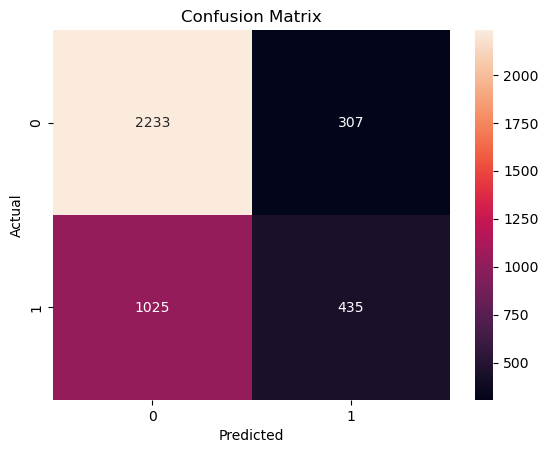

In [43]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (if available)

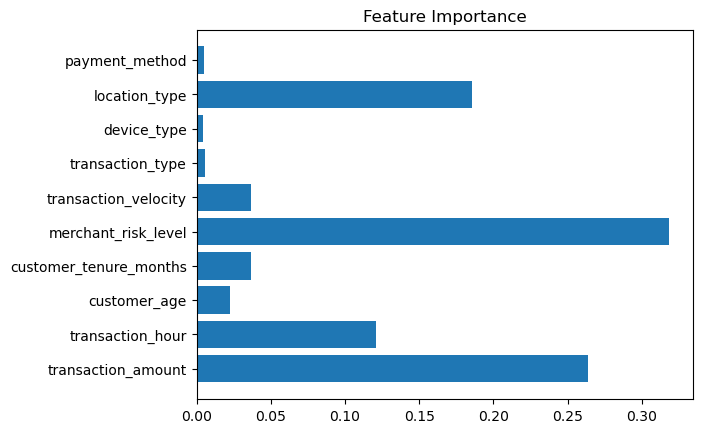

In [44]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    features = X.columns

    plt.figure()
    plt.barh(features, importances)
    plt.title('Feature Importance')
    plt.show()

# Save Model & Scaler

In [45]:
joblib.dump(best_model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully")

Model and scaler saved successfully
